In [10]:
%load_ext autoreload
%autoreload 2

import logging

logging.basicConfig(level=logging.WARNING)
logging.getLogger('anonymigraph').setLevel(logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from notebook_utils import get_ring_of_rings
G, pos= get_ring_of_rings(n_rings=6, nodes_per_ring=5, r_ring=3, r_graph=10)

In [12]:
import anonymigraph
from anonymigraph.anonymization import NestModelAnonymizer

depth = 2
G_nest = NestModelAnonymizer(depth=depth, r=10).anonymize(G, random_seed=11)
anonymigraph.anonymization.method_nest_model._validate_nest(G, G_nest, depth)

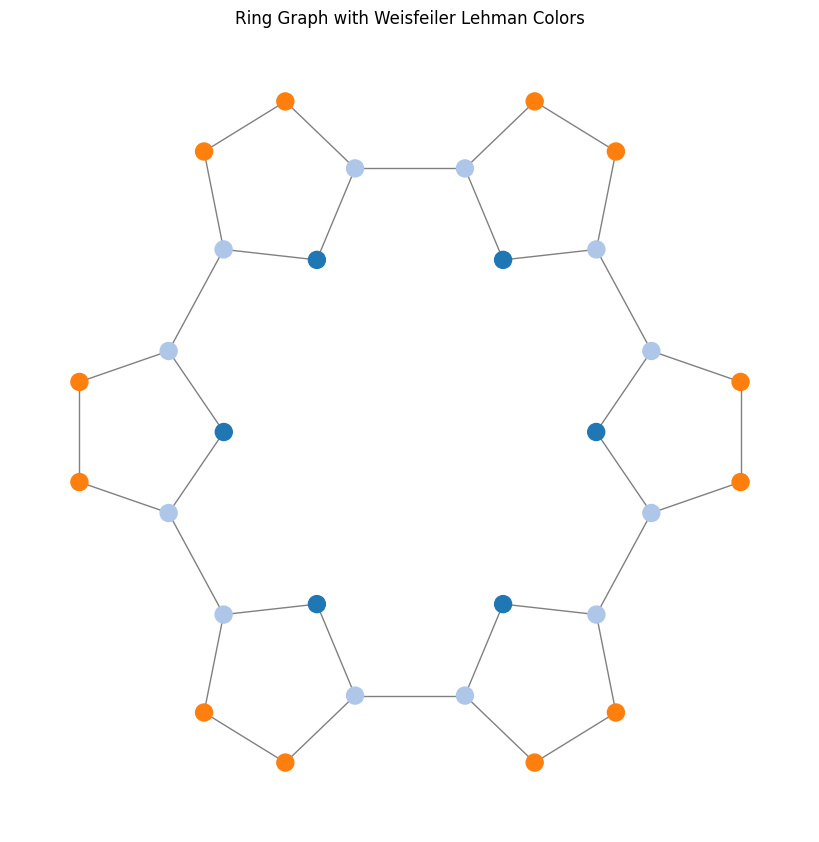

In [13]:
import matplotlib
import numpy as np
import networkx as nx
from anonymigraph.anonymization._external.nest_model.fast_wl import WL_fast

edges = np.array(G.edges, dtype=np.uint32)
bidirectional_edges = np.row_stack((edges, edges[:, [1, 0]]))
colors = WL_fast(bidirectional_edges, G.number_of_nodes(), labels=None, max_iter=None)[-1]
color_map = matplotlib.colormaps.get_cmap('tab20')
assert len(np.unique(colors)) < 20, "Colormap tab20 only supports 20 distinct colors, please use another colormap if you have more wl colors!"
node_colors = [color_map(cls%19) for cls in colors]

# Draw the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=150, edge_color='gray')
plt.title("Ring Graph with Weisfeiler Lehman Colors")
plt.show()

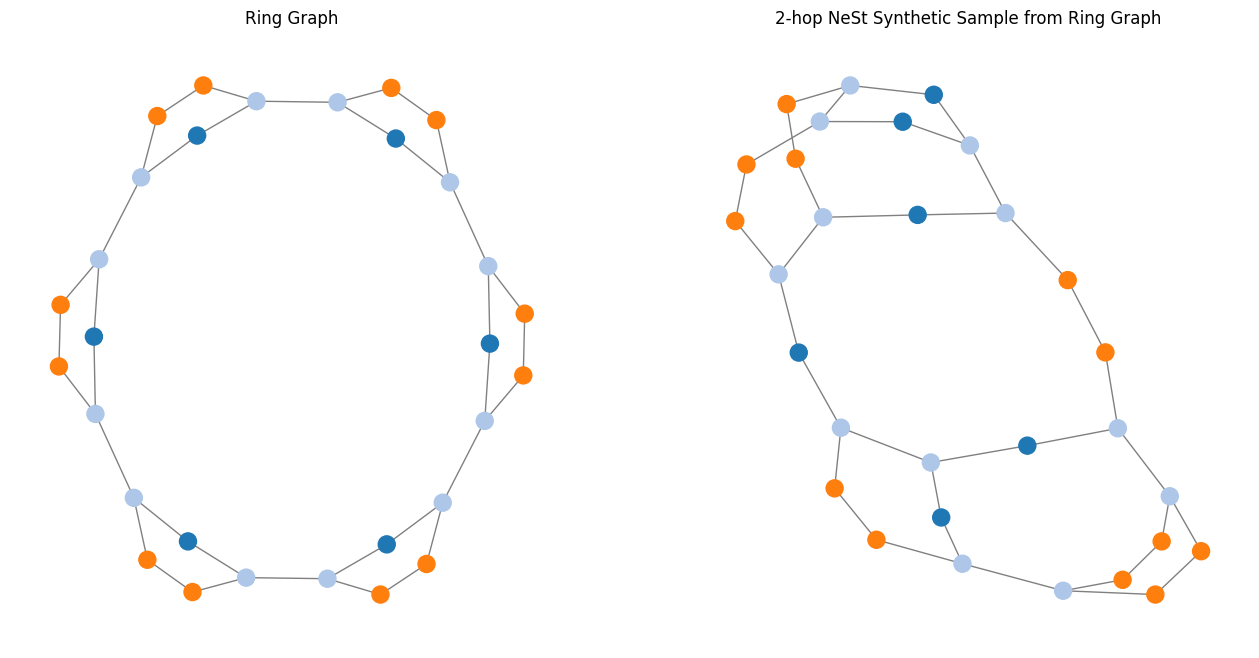

In [14]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
nx.draw(G, nx.spring_layout(G, iterations=2000), with_labels=False, node_color=node_colors, node_size=150, edge_color='gray')
plt.title("Ring Graph")

plt.subplot(1, 2, 2)
nx.draw(G_nest, nx.spring_layout(G_nest, iterations=2000), with_labels=False, node_color=node_colors, node_size=150, edge_color='gray')
plt.title(f"{depth}-hop NeSt Synthetic Sample from Ring Graph")

plt.show()

Attempts on bigger graphs

In [15]:
G = nx.erdos_renyi_graph(10000, 30/10000)

In [16]:
depth = 2
G_nest = NestModelAnonymizer(depth=depth, r=10).anonymize(G)

In [17]:
anonymigraph.anonymization.method_nest_model._validate_nest(G, G_nest, depth)